# A mettre dans un terminal pour pouvoir compiler
conda install -c conda-forge keras

conda install -c anaconda nltk

In [1]:
import sys
!{sys.executable} -m pip install keras

In [2]:
!pip install tensorflow
#import tensorflow as tf

In [3]:
import warnings
warnings.filterwarnings("ignore") 

import numpy as np
import pandas as pd

import sys
!{sys.executable} -m pip install keras

import nltk    #Natural language processing tool-kit
nltk.download('stopwords')

from nltk.corpus import stopwords                   #Stopwords corpus
from keras.datasets import imdb

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tounsi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

from sklearn.feature_extraction.text import TfidfTransformer

In [5]:
from keras.datasets import imdb

## Import des données

In [6]:
filename = "./sentiment_labelled_sentences/imdb_labelled.txt"

df = pd.read_csv(filename, sep="\t")
df.columns = ["sentence", "label"]

print("shape", df.shape)

shape (747, 2)


In [7]:
df.head()

,sentence,label
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0


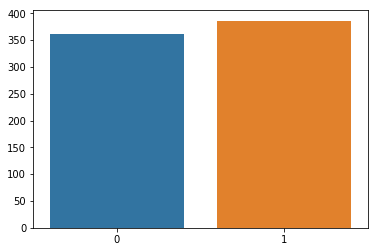

In [8]:
sns.barplot(np.unique(df['label']),df.groupby('label').count().values[:,0])

Il y'a a peu près autant de 0 que de 1. Le jeu de donné est donc bien balancé.

## Bag of words 

### Sur un sous-jeu de données

In [9]:
X_sub = df['sentence'][0:10]
X_sub[0]

'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '

On prend les 10 premiers textes.

On crée un dictionnaire, puis on compte le nombre d'apparition des mots du dictionnaire dans chaque texte (critique)

In [10]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)
dictionary_sub   = count_vect.get_feature_names()
print(dictionary_sub)

['about', 'acting', 'adorable', 'almost', 'and', 'angles', 'anything', 'art', 'artiness', 'as', 'attempting', 'audience', 'baby', 'became', 'because', 'best', 'bit', 'black', 'buffet', 'camera', 'casting', 'characters', 'charm', 'clever', 'disappointed', 'effort', 'emptiness', 'empty', 'even', 'existent', 'find', 'flat', 'for', 'gerardo', 'good', 'guess', 'half', 'head', 'his', 'hours', 'if', 'in', 'is', 'it', 'jimmy', 'keeps', 'kids', 'lacks', 'lines', 'little', 'lost', 'loved', 'meaning', 'messages', 'more', 'movie', 'music', 'nearly', 'non', 'not', 'of', 'or', 'out', 'owls', 'plot', 'poor', 'predictable', 'rest', 'ridiculous', 'running', 'saw', 'scene', 'science', 'song', 'speak', 'sure', 'teacher', 'that', 'the', 'those', 'thought', 'through', 'to', 'today', 'trying', 'two', 'very', 'walked', 'was', 'wasted', 'were', 'when', 'white', 'who', 'whom', 'with', 'works']


In [11]:
dictionary_sub[78]

'the'

In [12]:
print(count_vect.vocabulary_.get(u'who'))

93


In [13]:
print(X_sub_counts.shape) 
print(X_sub_counts[0])
print(type(X_sub_counts))
X_sub[0]

(10, 97)
  (0, 62)	1
  (0, 87)	1
  (0, 94)	1
  (0, 60)	1
  (0, 36)	1
  (0, 57)	1
  (0, 11)	1
  (0, 61)	1
  (0, 21)	1
  (0, 31)	1
  (0, 78)	2
  (0, 50)	1
  (0, 54)	1
  (0, 88)	1
  (0, 93)	1
  (0, 75)	1
  (0, 59)	1
<class 'scipy.sparse.csr.csr_matrix'>


'Not sure who was more lost - the flat characters or the audience, nearly half of whom walked out.  '

hauteur 10 largeur 97 (10 phrases et 97 mots)

sparce enleve les 0

In [14]:
print(X_sub_counts.toarray()[0,:])

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 2 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0]


Permet de transformé notre tableau (précèdemment vu) en vecteur de taille 97. Ce vecteur correspond au nombre de fois où le mot apparait dans le texte

In [15]:
word_counts = pd.DataFrame(X_sub_counts.toarray(),columns = dictionary_sub)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary_sub

In [16]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]

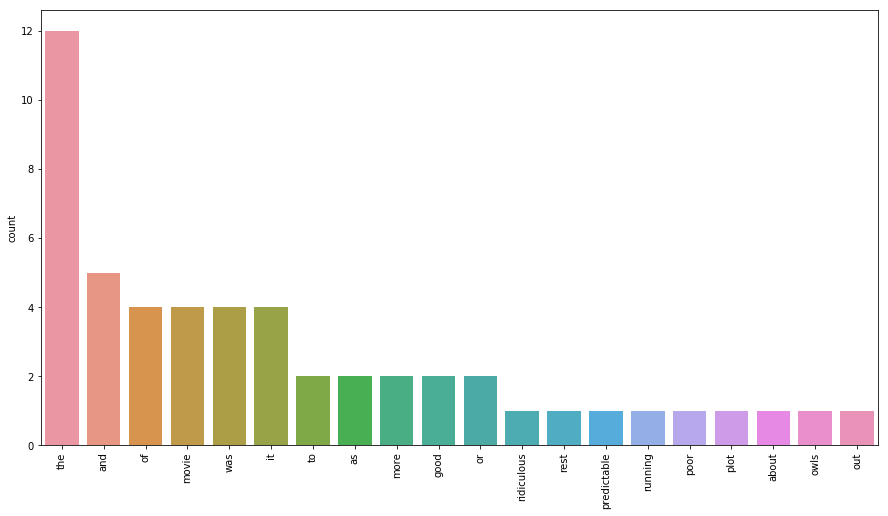

In [17]:
plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()

On définit une fonction qui prend en encapsule ce qui précède

In [18]:
def most_frequent_words(count_vect,data):    
    data_counts = count_vect.fit_transform(data)
    dictionary   = count_vect.get_feature_names()
    print("Taille du dictionnaire : ",len(dictionary))
    word_counts = pd.DataFrame(data_counts.toarray(),columns = dictionary)
    word_total_counts = pd.DataFrame()
    word_total_counts['count'] = word_counts.sum(axis=0)
    word_total_counts['word'] = dictionary
    word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:20]
    plt.figure(figsize=(15,8))
    sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
    plt.xticks(rotation=90,fontsize=10)
    plt.show()
    return {'data_counts' : data_counts, 'word_total_counts' :word_total_counts, 'dictionary' : dictionary}

In [19]:
count_vect = CountVectorizer()
X_sub_counts = count_vect.fit_transform(X_sub)

Taille du dictionnaire :  97


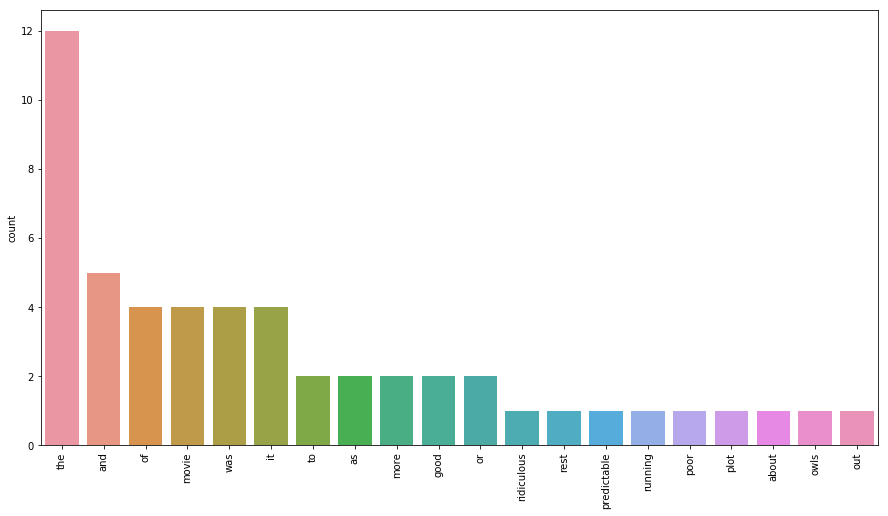

In [20]:
most_frequent_words_sub = most_frequent_words(count_vect,X_sub)

fréquence des mots par ordre décroissant.

les phrases parlent de film donc movie pas interessant, mais les autres après or sont interressant.

### Passage aux données complètes

In [21]:
X = df['sentence']

On utilise toute les données

Taille du dictionnaire :  3044


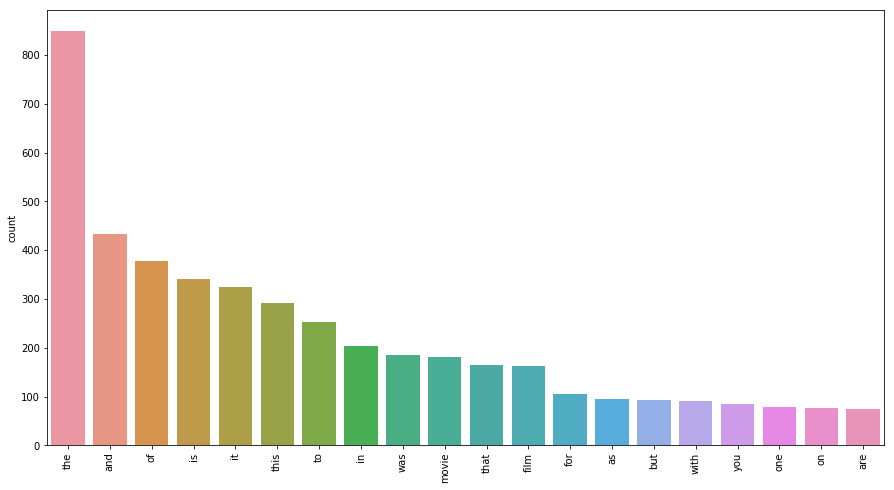

In [22]:
most_frequent_words_tot = most_frequent_words(count_vect,X)

Même chose avec 3044 mots dans le dictionnaire cette fois. (Il y'a toute les données)

On peut tous les enlevés, car ils ne renseignent rien sur le film.


Quels problèmes voyez-vous ?

## Préparation des données

### Miniscules UTF-8 sans ponctuation

Toujours vérifier que les mots sont en minuscule, qu'il n'a pas de signe de ponctuation, etc

### Stopwords

In [23]:
stop = set(stopwords.words('english')) 
print(stop)

{'no', 'her', 'a', 'ain', 'won', 'hadn', 'not', 'd', 'didn', 'did', 'is', "you'd", 'doesn', 'it', 'both', 'those', 'own', 'its', "weren't", 'having', 'then', 'herself', 'by', 'couldn', 'for', 'hers', 'which', 'mightn', 'with', 'too', 'an', 'himself', 'you', 'why', 'mustn', 'his', 'been', 'my', 'do', 'should', 'where', 'ours', "didn't", "you're", 'to', 'myself', 'at', 'over', 'o', 'further', 'against', 's', "doesn't", 'were', 'are', "couldn't", 'under', 've', 'am', 'below', 'nor', 'we', 'but', 'm', 'can', "needn't", 'wasn', "she's", 'themselves', 'does', 'and', "hadn't", 'through', "hasn't", 'until', "won't", 'she', 'they', 'the', 'weren', 'needn', 'before', 'once', 'who', "should've", 'yours', 'out', 'all', 'off', 'only', 'if', 'between', 'such', 'of', 't', 'was', 'other', "haven't", 'has', 'these', 'wouldn', 'into', 'from', "wouldn't", 'or', "shan't", "mustn't", 'aren', 'up', 'he', 'so', 'i', 'because', 'yourselves', 'ourselves', 'itself', 'that', 'their', 'ma', 'same', 'just', 'some'

stop = tous les mots qui ne nous interressent pas

Pour enlever movie et film on peut faire la commande suivante:

In [24]:
stop_plus = stop.add('movie')
#stop_plus1 = stop.add('film')

Taille du dictionnaire :  2912


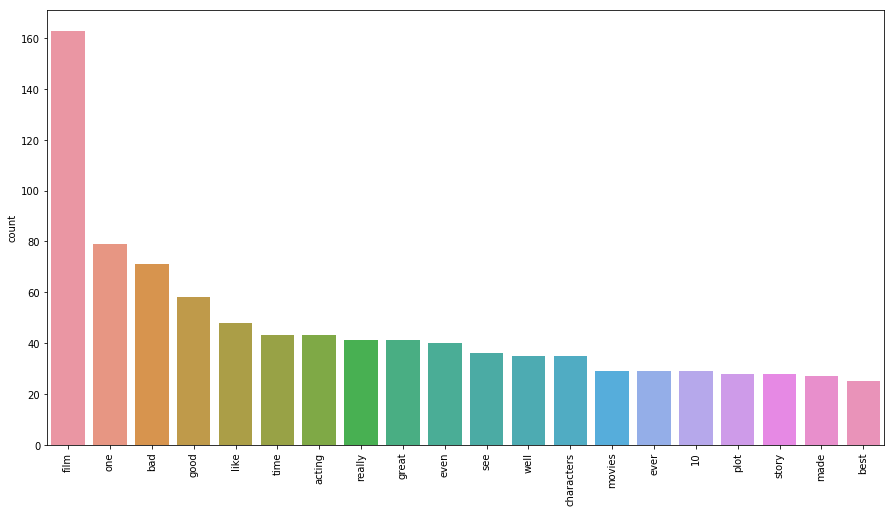

In [25]:
count_vect_sw = CountVectorizer(stop_words=stop) # CountVectorizer(stop_words=stop_plus#1)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X)

On enleve les mots qui ne nous interressent pas

### Visualisation du corpus

On voit que le film a été plus noté mauvais que bon.
Mais si on ajoute les 'great' à 'good' et tous les autres synonymes, il en ressort que le film est souvent mieux acceuillis que l'inverse. 

In [26]:
most_frequent = np.array(most_frequent_words_sw['data_counts'].toarray())
hist = most_frequent / most_frequent.sum(axis=1)[:,None]

In [27]:
hist[np.argsort(df['label']),:]

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

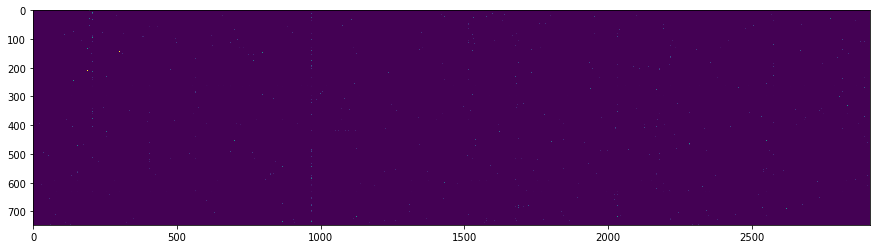

In [28]:
plt.figure(figsize=(15,8))
plt.imshow(hist[np.argsort(df['label']),:])
#plt.colorbar()

En haut y = 0.

En bas y = 1.

Ces points permettent de visualiser notre text

violet le mot n'apparait pas

plus c'est jaune plus le mot apparait 

### Avec TF_IDF

In [29]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [30]:
transformer = TfidfTransformer(smooth_idf=False)
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False,
         use_idf=True)

In [31]:
tf_idf_transf = transformer.fit_transform(most_frequent_words_sw['data_counts'])

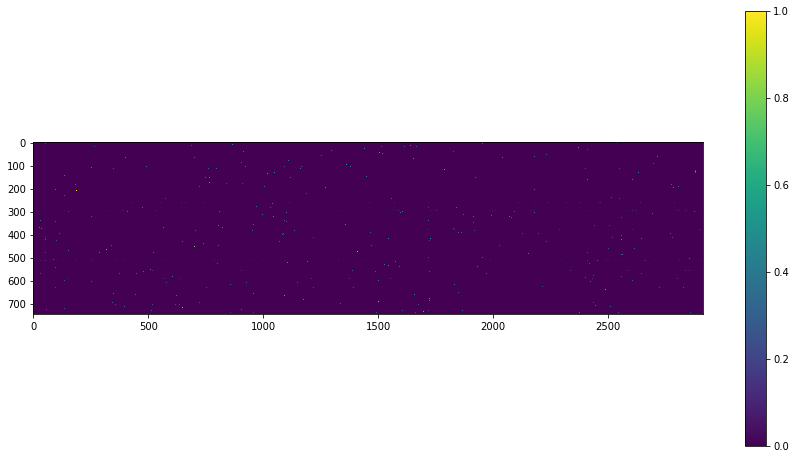

In [32]:
plt.figure(figsize=(15,8))
plt.imshow(tf_idf_transf.toarray()[np.argsort(df['label']),:])
plt.colorbar()

## Apprentissage supervisé

### Sur les counts

In [33]:
NB_counts = MultinomialNB()
NB_counts.fit(X=most_frequent_words_sw['data_counts'],y=df['label'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),df['label'])

0.9678714859437751

### Sur le TF-IDF

In [34]:
NB_tfidf = GaussianNB()
NB_tfidf.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),df['label'])

0.9665327978580991

In [35]:
df['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])

In [36]:
df['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())

In [37]:
df[df['prediction_tfidf'] != df['label']]

,sentence,label,prediction_counts,prediction_tfidf
23,Give this one a look.,1,1,0
38,I don't think you will be disappointed.,1,0,0
58,A great film by a great director.,1,1,0
63,10/10,1,1,0
163,Everything from acting to cinematography was s...,1,1,0
250,"I won't say any more - I don't like spoilers, ...",1,1,0
293,But this movie really got to me.,1,1,0
294,See it.,1,1,0
312,The cast is good.,1,1,0
332,the cast was great.,1,1,0


In [38]:
df[df['prediction_counts'] != df['label']]

,sentence,label,prediction_counts,prediction_tfidf
20,If there was ever a movie that needed word-of-...,1,0,1
38,I don't think you will be disappointed.,1,0,0
49,The directing and the cinematography aren't qu...,0,1,0
76,"I saw ""Mirrormask"" last night and it was an un...",0,1,0
123,Highly unrecommended.,0,1,0
131,There were too many close ups.,0,1,0
142,It even has its sweet moments.,1,0,1
175,"If you see it, you should probably just leave ...",0,1,0
235,1/10 - and only because there is no setting fo...,0,1,0
244,The last 15 minutes of movie are also not bad ...,1,0,1


In [39]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X=tf_idf_transf.toarray(),y=df['label'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),df['label'])

0.9799196787148594

In [40]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])

Mots avec le coeff le plus négatif :  bad
Mots avec le coeff le plus positif :  wonderful


### Avec une pipeline

In [41]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)),])

In [42]:
text_clf.fit(X,df['label'])#
accuracy_score(text_clf.predict(X),df['label'])

0.9825970548862115

On a 98% de chance de savoir si le commentaire est négatif ou positif

## Jeu de données complet

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

In [43]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data()

In [44]:
X_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [45]:
np.unique(y_test)

array([0, 1], dtype=int64)

### Les textes ont été hashés

In [ ]:
X_train[0:2]

Les mots sont encodés en nombre

### On essaie de reconstruire le 6-ième texte

Il faut utiliser les algo du cours.

Naive Baye, LDA, QDA, kNN, arbres (3-4)

In [ ]:
def getKeysByValue(dictOfElements, valueToFind):
    listOfKeys = list()
    listOfItems = dictOfElements.items()
    for item  in listOfItems:
        if item[1] == valueToFind:
            listOfKeys.append(item[0])
    print(listOfKeys)

In [ ]:


for word_num in X_train[1]:
    getKeysByValue(imdb.get_word_index(),word_num)
    

In [48]:
word_to_id = imdb.get_word_index()
word_to_id = {k:(v+3) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0    
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2      # 0 1 et 2 n'étant pas des mots du dictionnaire, 
                            #et chaque debut de phrase commence par le chiffre 1, nous consideront donc que c'est le "start"



c=[]
for i in range (len(X_train)):  # nous traduiront uniquement les 1000 1ers commentaires car sinon le programme dure trop longtemps
    id_to_word = {value:key for key,value in word_to_id.items()}
    c.append(' '.join(id_to_word[id] for id in X_train[i])) # c contient donc tous les commentaires sous le format texte
                 
data1=pd.DataFrame(c,columns=["Commentaire"])
data1["label"]=y_train

In [49]:
data1.head()

,Commentaire,label
0,<START> this film was just brilliant casting l...,1
1,<START> big hair big boobs bad music and a gia...,0
2,<START> this has to be one of the worst films ...,0
3,<START> the scots excel at storytelling the tr...,1
4,<START> worst mistake of my life br br i picke...,0


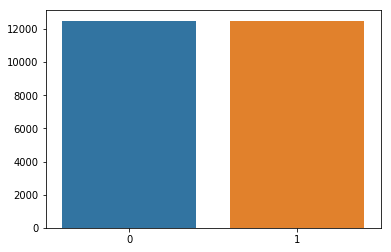

In [50]:
sns.barplot(np.unique(data1['label']),data1.groupby('label').count().values[:,0])

Il semble y avoir le meme nombre de labels 0 et 1

### Etude d'un sous jeu de données

In [60]:
X = data1["Commentaire"][0:10]
stop = set(stopwords.words('english'))  
stop.update({'movie','film'})
print(stop)

#on étudie un echantillon, c'est a dire seulement les 10 1ers commentaires

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)
dictionary= count_vect.get_feature_names()
#print(dictionary)



{'no', 'her', 'a', 'ain', 'won', 'hadn', 'not', 'movie', 'd', 'didn', 'did', 'is', "you'd", 'doesn', 'it', 'both', 'those', 'own', 'its', 'film', "weren't", 'having', 'then', 'herself', 'by', 'couldn', 'for', 'hers', 'which', 'mightn', 'with', 'too', 'an', 'himself', 'you', 'why', 'mustn', 'his', 'been', 'my', 'do', 'should', 'where', 'ours', "didn't", "you're", 'to', 'myself', 'at', 'over', 'o', 'further', 'against', 's', "doesn't", 'were', 'are', "couldn't", 'under', 've', 'am', 'below', 'nor', 'we', 'but', 'm', 'can', "needn't", 'wasn', "she's", 'themselves', 'does', 'and', "hadn't", 'through', "hasn't", 'until', "won't", 'she', 'they', 'the', 'weren', 'needn', 'before', 'once', 'who', "should've", 'yours', 'out', 'all', 'off', 'only', 'if', 'between', 'such', 'of', 't', 'was', 'other', "haven't", 'has', 'these', 'wouldn', 'into', 'from', "wouldn't", 'or', "shan't", "mustn't", 'aren', 'up', 'he', 'so', 'i', 'because', 'yourselves', 'ourselves', 'itself', 'that', 'their', 'ma', 'same

In [52]:
print(X_counts.shape) 
print(X_counts[0])
print(type(X_counts))

(10, 862)
  (0, 800)	1
  (0, 657)	1
  (0, 20)	1
  (0, 434)	1
  (0, 683)	1
  (0, 782)	1
  (0, 452)	1
  (0, 223)	1
  (0, 224)	1
  (0, 572)	1
  (0, 73)	1
  (0, 664)	1
  (0, 747)	1
  (0, 117)	1
  (0, 832)	2
  (0, 581)	1
  (0, 89)	1
  (0, 713)	1
  (0, 798)	1
  (0, 332)	1
  (0, 28)	3
  (0, 744)	1
  (0, 561)	1
  (0, 696)	1
  (0, 76)	2
  :	:
  (0, 615)	1
  (0, 746)	2
  (0, 82)	2
  (0, 379)	1
  (0, 175)	1
  (0, 857)	4
  (0, 41)	9
  (0, 562)	2
  (0, 748)	4
  (0, 545)	2
  (0, 740)	15
  (0, 716)	1
  (0, 595)	2
  (0, 255)	2
  (0, 209)	1
  (0, 703)	2
  (0, 640)	1
  (0, 441)	1
  (0, 134)	1
  (0, 110)	3
  (0, 408)	4
  (0, 814)	11
  (0, 280)	6
  (0, 753)	3
  (0, 697)	1
<class 'scipy.sparse.csr.csr_matrix'>


In [53]:


word_counts = pd.DataFrame(X_counts.toarray(),columns = dictionary)
word_total_counts = pd.DataFrame()
word_total_counts['count'] = word_counts.sum(axis=0)
word_total_counts['word'] = dictionary



In [54]:
word_total_counts_sorted_top  = word_total_counts.sort_values(by="count",ascending = False).iloc[0:50]

On repere les 50 mots les plus fréquents

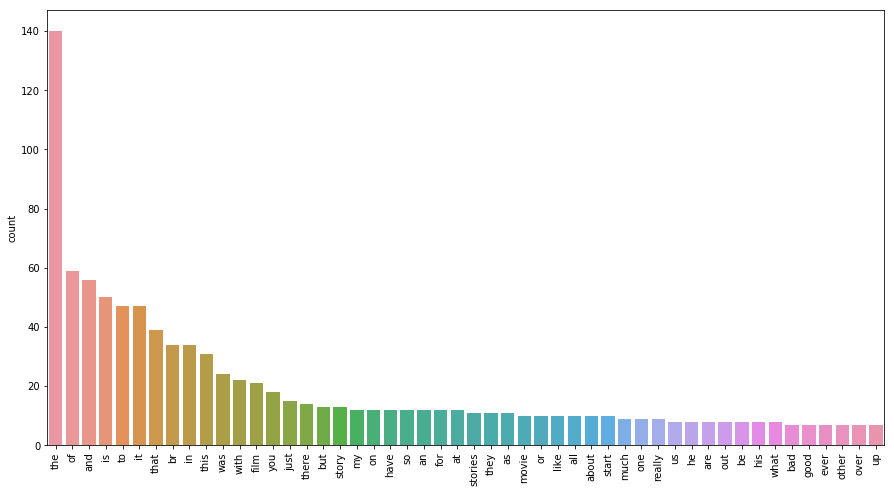

In [55]:


plt.figure(figsize=(15,8))
sns.barplot(x = word_total_counts_sorted_top.index,y=word_total_counts_sorted_top['count'])
plt.xticks(rotation=90,fontsize=10)
plt.show()



In [56]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X)

Taille du dictionnaire :  862


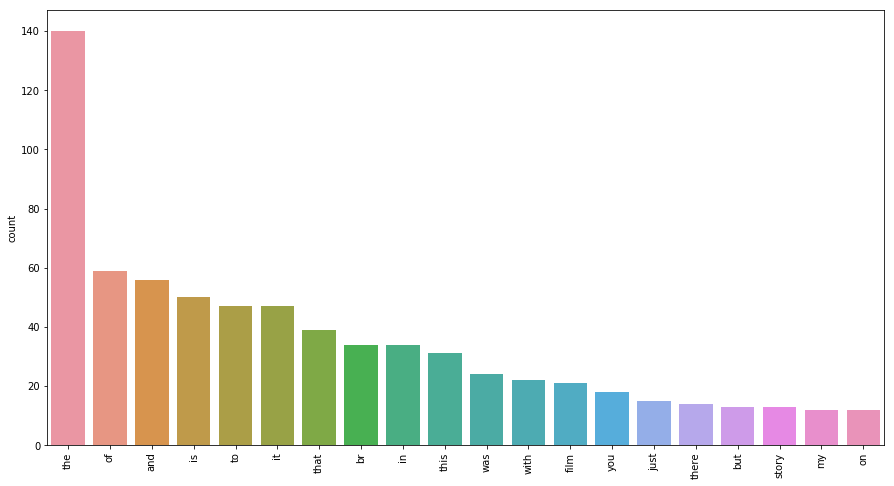

In [57]:
most_frequent_words_tot = most_frequent_words(count_vect,X)

#### Passage aux données complete 

In [83]:
X1= data1["Commentaire"]
#on va étudier tous les commentaires maintenant c'est a dire les 25 000 .

In [84]:

count_vect_sw = CountVectorizer(stop_words=stop)
most_frequent_words_sw = most_frequent_words(count_vect_sw,X1)
# on supprime les stopword des mots les plus frequents
#malheureusement je n'arrive plus a rien affiché à partir de ce moment la, cependant j
#j'ai essayé d'ecrire le code adapté à la suite

Taille du dictionnaire :  74556


MemoryError: 

## Apprentissage supervisé 


### Sur les counts

In [79]:
NB_counts = MultinomialNB()
NB_counts.fit(X1=most_frequent_words_sw['data_counts'],y=data1['label'])
accuracy_score(NB_counts.predict(most_frequent_words_sw['data_counts']),data1["label"])

TypeError: fit() got an unexpected keyword argument 'X1'

### Sur le TF-IDF

In [81]:


NB_tfidf = GaussianNB()
NB_tfidf.fit(X1=tf_idf_transf.toarray(),y=data1['label'])
accuracy_score(NB_tfidf.predict(tf_idf_transf.toarray()),data1['label'])



TypeError: fit() got an unexpected keyword argument 'X1'

In [82]:
data1['prediction_counts'] = NB_counts.predict(most_frequent_words_sw['data_counts'])

NotFittedError: This MultinomialNB instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:


data1['prediction_tfidf'] = NB_tfidf.predict(tf_idf_transf.toarray())



In [ ]:


data1[data1['prediction_tfidf'] != data1['label']]



In [ ]:
data1[data1['prediction_counts'] != data1['label']]

In [ ]:
NB_logistic = SGDClassifier(loss='hinge', penalty='l2',\
                           alpha=1e-3, random_state=42,\
                           max_iter=5, tol=None)
logistic_fit = NB_logistic.fit(X1=tf_idf_transf.toarray(),y=data1['label'])
accuracy_score(NB_logistic.predict(tf_idf_transf.toarray()),data1['label'])

In [ ]:
print("Mots avec le coeff le plus négatif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][0]])
print("Mots avec le coeff le plus positif : ", most_frequent_words_sw['dictionary'][np.argsort(NB_logistic.coef_)[0][-1]])